# Word Cloud

- Show most frequent words
- word cloud

# 1)- Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import numpy as np 
import pickle
import pandas as pd 

#For Visuals
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})

Populating the interactive namespace from numpy and matplotlib


# 2)- Load data

In [3]:
import pickle
#Loading from firm cleaned file
dataset = pd.read_pickle('descript.pkl')
dataset.shape

(455727, 3)

In [4]:
dataset.head()

,TEXT,UTC DATE,Sent_type
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47,Benefit
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,Neutral
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,Benefit
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,Neutral
5,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15,Neutral


In [5]:
dataset.shape

(455727, 3)

In [6]:
dataset.Sent_type.value_counts()

Neutral    195720
Benefit    182529
Risky       77478
Name: Sent_type, dtype: int64

In [7]:
dataset.isnull().sum()

TEXT         0
UTC DATE     0
Sent_type    0
dtype: int64

# 3)- Text data descriptive analysis

### 3.1)-Most common and uncommon words

In [8]:
#Identify top 20 most common/frequently occuring words
common = pd.Series(' '.join(dataset['TEXT']).split()).value_counts()[:20]
common

the             233542
to              156809
a               154162
in              123955
of              108521
and             107172
for              79673
is               68758
on               60419
self-driving     57938
…                57395
with             51608
at               50883
I                46310
The              43428
BMW              42692
-                38557
Motors           37555
you              36331
car              34687
dtype: int64

### 3.2)- Most uncommon words

In [9]:
#Identify top 20 uncommon words
uncommon=pd.Series(' '.join(dataset['TEXT']).split()).value_counts()[-20:]
uncommon

@auditographypic.twitter.com/v1AjkpPRvS                                                                    1
services..."                                                                                               1
pic.twitter.com/y0WY9G6JNY                                                                                 1
#silverarrowspic.twitter.com/yTrBm77nj1                                                                    1
…pic.twitter.com/O5n58Khgag                                                                                1
https://uberxneurips2018.splashthat.com/                                                                   1
http://bit.ly/1Ws3LO1                                                                                      1
design.pic.twitter.com/yst3R61hFF                                                                          1
Ali…                                                                                                       1
lipo               

# 4)- Text Preprocessing
- clean-up
- shrink vocab
- reduce sparsity

In [10]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [11]:
# for noise removal

import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# STOPWORDS

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [13]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;#]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z +_]')
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['rt', 'http']) # extend stopwords; rt means re-tweet
STOPWORDS = set(STOPWORDS)

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS]) # delete stopwords from text
    text = text.strip()
    return text

In [14]:
dataset['cleaned']=[text_prepare(x) for x in dataset['TEXT']]

# 5)-Word Cloud Visualization

### 5.1)- Word cloud for clean dataset

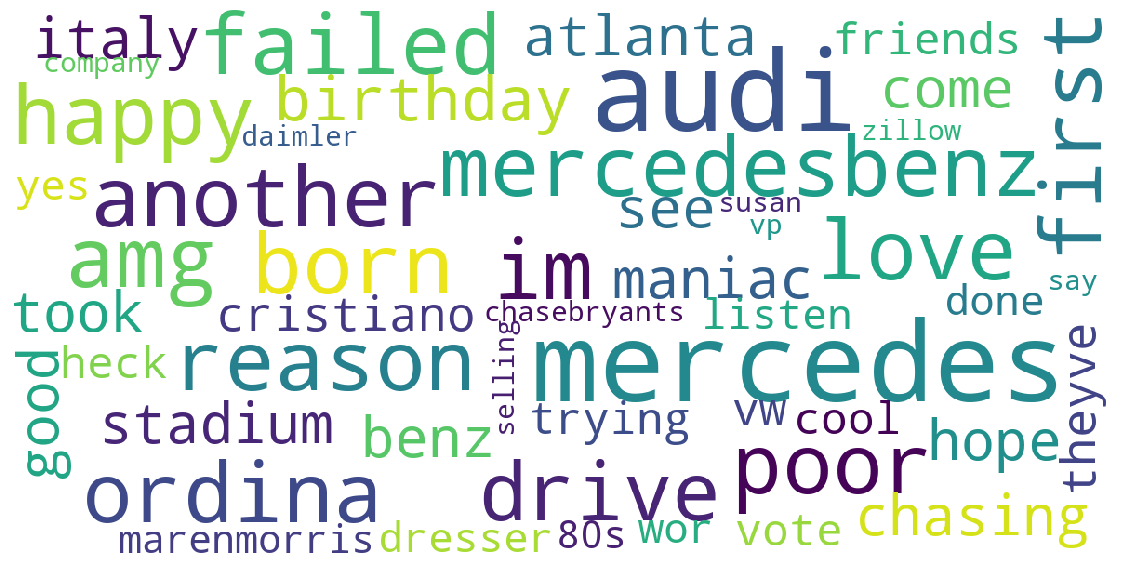

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 50 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(dataset['cleaned'].dropna())

### 5.2)-Word cloud for original dataset

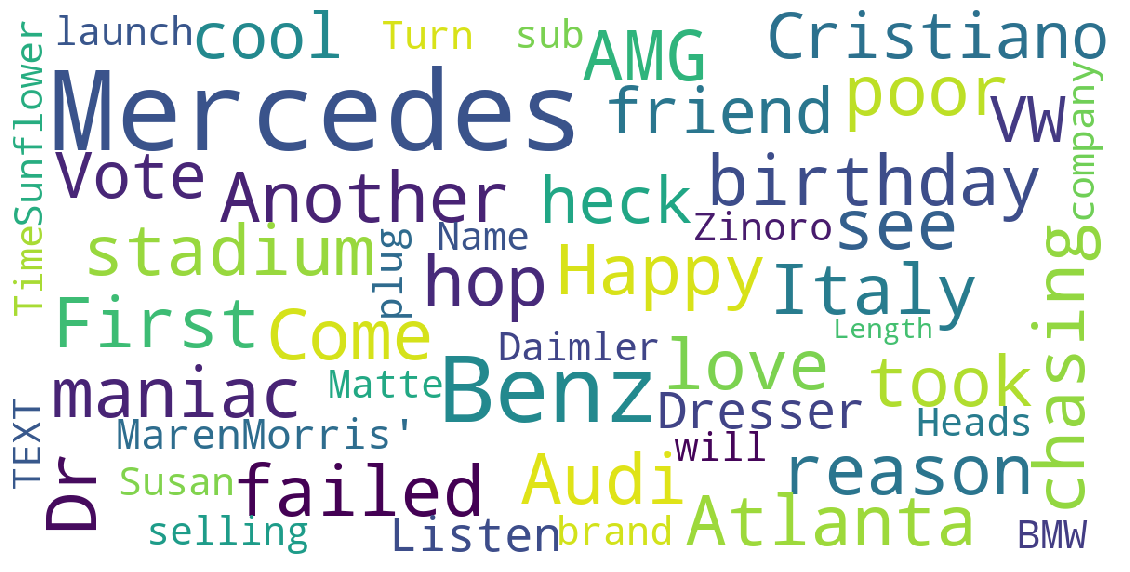

In [16]:
Mywordcloud(dataset['TEXT'].dropna())

### 5.3)- Word cloud for Risky sentiments

In [17]:
dataset.head()

,TEXT,UTC DATE,Sent_type,cleaned
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47,Benefit,another reason failed love im poor born ordina...
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,Neutral,2019 mercedesbenz c 300 amg c 43 first drive r...
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,Benefit,happy birthday audi chasing maniac hope good d...
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,Neutral,come see mercedes benz stadium atlanta
5,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15,Neutral,italy took cristiano ever since theyve trying ...


In [18]:
r=dataset

In [19]:
r=r[r.Sent_type=='Risky']

In [20]:
r.shape

(77478, 4)

In [21]:
r.head()

,TEXT,UTC DATE,Sent_type,cleaned
11,Jason’s buying a VW Beetle and I can’t stop ca...,2018-07-31 22:26:11,Risky,jasons buying vw beetle cant stop calling bug boi
21,No doubt trump is doing a fine job!pic.twitter...,2018-07-31 23:55:23,Risky,doubt trump fine jobpictwittercom h6jc0zuvz4
34,BMW plans first EU plant in two decades amid t...,2018-07-31 22:01:07,Risky,bmw plans first eu plant two decades amid trad...
35,distinguished gay: jeremy distinguished bi: ro...,2018-07-31 21:52:35,Risky,distinguished gay jeremy distinguished bi rosi...
37,Lets see if we can get through season 4 withou...,2018-07-31 21:27:18,Risky,lets see get season 4 without wynonna sufferin...


In [22]:
r.Sent_type.unique()

array(['Risky'], dtype=object)

In [23]:
r.isnull().sum()

TEXT         0
UTC DATE     0
Sent_type    0
cleaned      0
dtype: int64

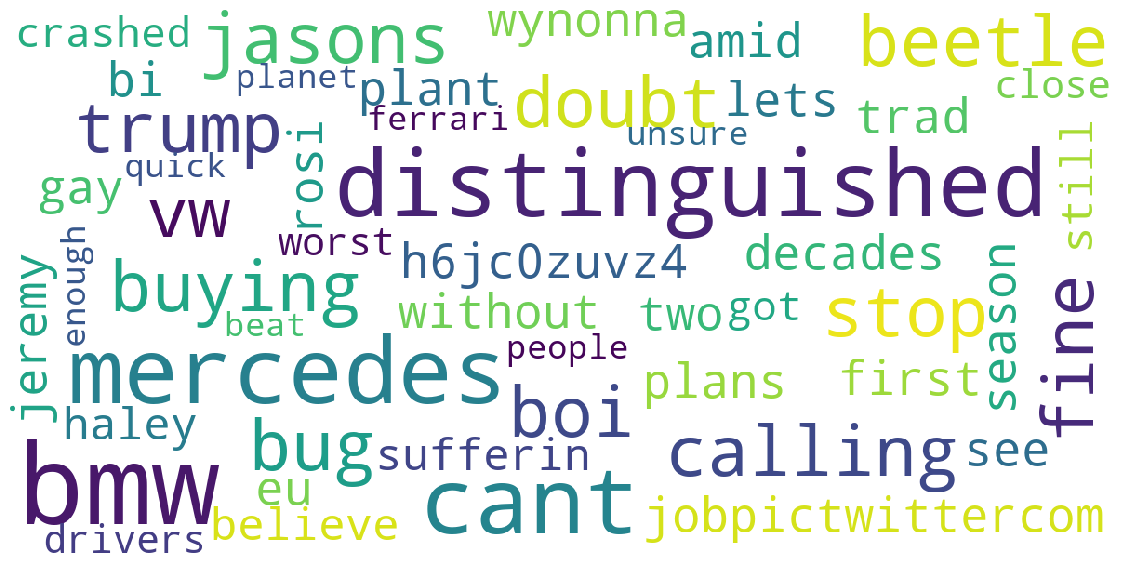

In [24]:
Mywordcloud(r['cleaned'].dropna())

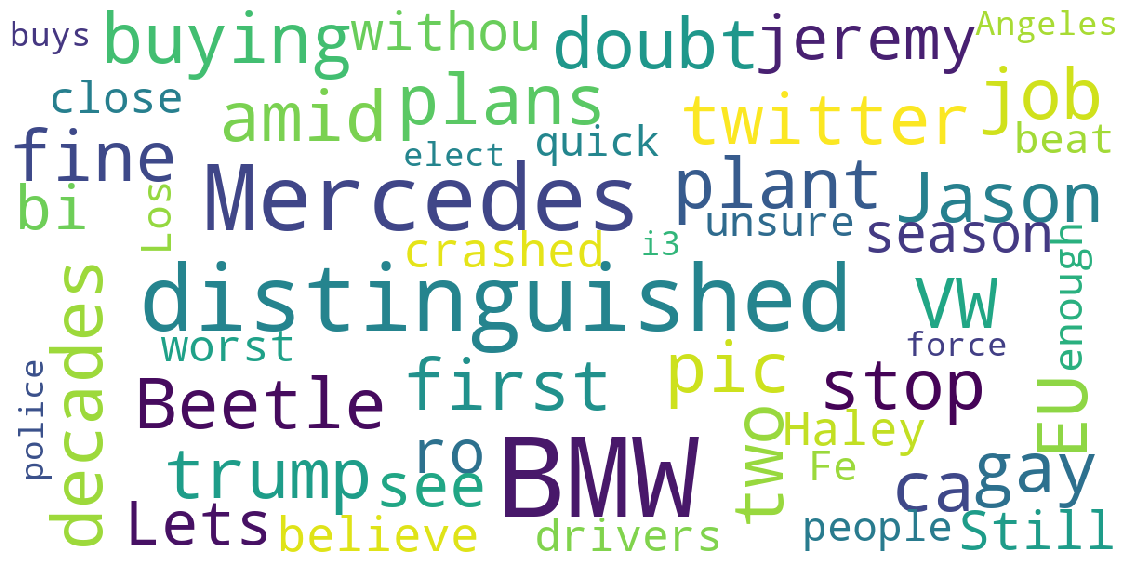

In [25]:
Mywordcloud(r['TEXT'].dropna())

### 5.4)- Word cloud for Benefit sentiments

In [26]:
b=dataset

In [27]:
b=b[b.Sent_type=='Benefit']

In [28]:
b.head()

,TEXT,UTC DATE,Sent_type,cleaned
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47,Benefit,another reason failed love im poor born ordina...
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,Benefit,happy birthday audi chasing maniac hope good d...
6,"Lookin’ good, @Matt_Hedges #MLSAllStar | @Au...",2018-07-31 23:04:43,Benefit,lookin good matt_hedges mlsallstar audi pictwi...
9,"Oshey version of ""theChefchi"". Porsche and as...",2018-07-31 22:51:42,Benefit,oshey version thechefchi porsche assurance vid...
13,how do you pronounce audi? rt for ahdi like...,2018-07-31 23:47:16,Benefit,pronounce audi ahdi like owdi


In [29]:
b.shape

(182529, 4)

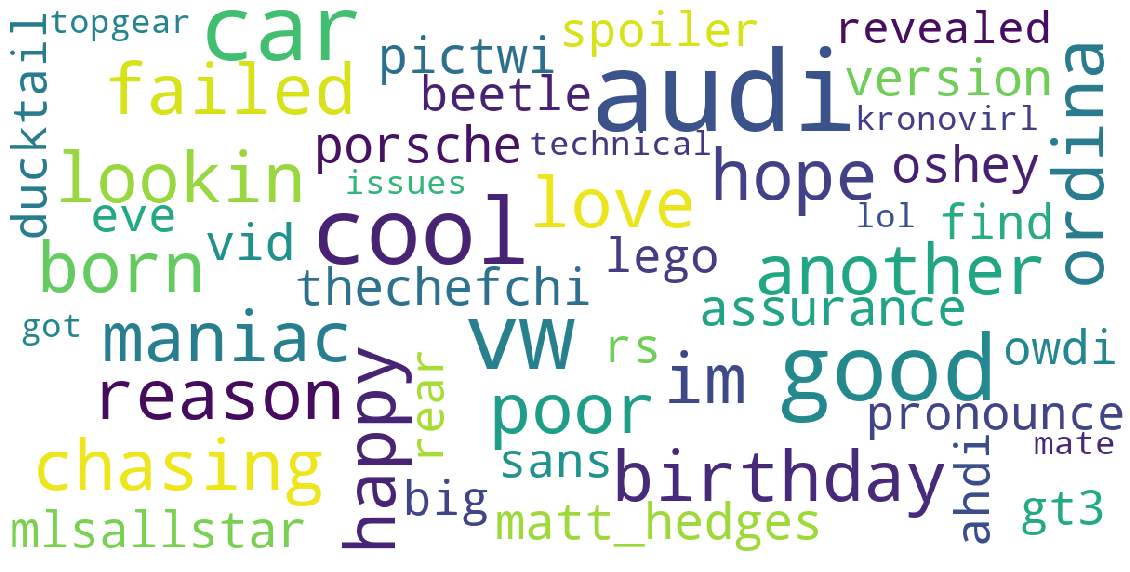

In [30]:
Mywordcloud(b['cleaned'].dropna())

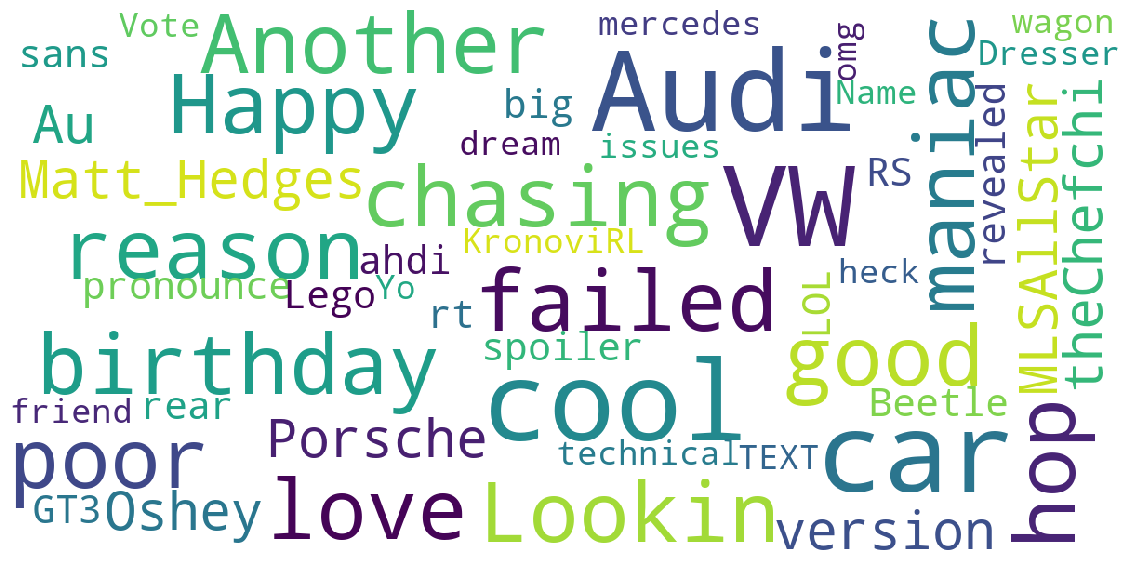

In [31]:
Mywordcloud(b['TEXT'].dropna())

# END of Notebook